In [2]:
import os,sys,pathlib
sys.path.insert(1, os.path.join(sys.path[0], pathlib.Path(os.getcwd()).parent))

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
import matplotlib.patches as mpatches

In [3]:
from RideSimulator.taxi_sim import run_simulation

Loading trip data...
Data loading complete
The Simulation will run for 0.0 weeks, 2.0 days, 0.0 hours.



Simulation Ended
Number of trips generated: 2993
Trip Completion Percentage: 0.861343133979285


In [4]:
_, a, g = run_simulation([1,2,3,4])

Number of weeks: 1
Number of trips generated: 4708


In [5]:
driver_data = a.driver_actions.xs(0, level=1).copy()
driver_data.sort_values(by='assigned_time', inplace=True)

In [6]:
driver_data

,created_time,assigned_time,pickup_loc,drop_loc,driver_loc,pickup_time,travel_time,driver_action
trip_id,,,,,,,,
7,160,210.0,"[21.066000000005683, 33.97933333333332]","[20.644953277707753, 16.739639232664956]","[36, 12]",266.0,172.0,0
10,240,240.0,"[36.80599999999886, 28.893000000000157]","[15.952679135966424, 38.502402044018744]","[36, 12]",169.0,230.0,0
11,240,340.0,"[10.61700000000019, 38.44766666666648]","[38.240837748317205, 35.99919570266608]","[36, 12]",367.0,277.0,1
33,1060,1210.0,"[2.223000000004737, 16.830666666666666]","[4.394584156559439, 9.201755368254531]","[38.240837748317205, 35.99919570266608]",408.0,79.0,0
41,1420,1520.0,"[18.381000000002842, 10.591666666666937]","[12.512562250473064, 28.217580717720423]","[38.240837748317205, 35.99919570266608]",322.0,186.0,0
...,...,...,...,...,...,...,...,...
4650,99220,99370.0,"[8.42900000000303, 8.422666666666535]","[19.93147386703501, 14.063607852038452]","[39.14615391019719, 7.482814219499648]",307.0,128.0,1
4666,99810,99860.0,"[8.152000000002085, 19.29966666666681]","[3.0983091938973537, 6.25685515500164]","[19.93147386703501, 14.063607852038452]",129.0,140.0,1
4683,100130,100180.0,"[19.48100000000038, 7.3233333333331805]","[27.588101041296206, 14.702482432312948]","[3.0983091938973537, 6.25685515500164]",164.0,110.0,1


In [7]:
trip_times = []
for i in driver_data[['assigned_time','driver_action','pickup_time','travel_time']].values:
    if i[1] == 1:
        assign_time = i[0]
        pickup_time = assign_time + i[2]
        drop_time = pickup_time + i[3]
        points = [assign_time,pickup_time,drop_time]
        trip_times.append(points)

In [17]:
states = {'idle':1,'pick_up':1,'in_trip':1}
color_mapping = {"idle" : "C0", "pick_up" : "C1", "in_trip" : "C2"}
state_mapping = {0:"pick_up",1:'in_trip'}

verts = []
colors = []
end_time = 0
for t in trip_times[:50]:
    v = [
        (end_time, states['idle']-0.4),
        (end_time, states['idle']+0.4),
        (t[0], states['idle']+0.4),
        (t[0], states['idle']-0.4),
        (end_time, states['idle']-0.4),
    ]
    
    verts.append(v)
    colors.append(color_mapping['idle'])

    for k in range(2):
        state = states[state_mapping[k]]
        v = [
            (t[k], state - 0.4),
            (t[k], state + 0.4),
            (t[k+1], state + 0.4),
            (t[k+1], state - 0.4),
            (t[k], state - 0.4),
        ]

        verts.append(v)
        colors.append(color_mapping[state_mapping[k]])
    
    
    end_time = t[2]

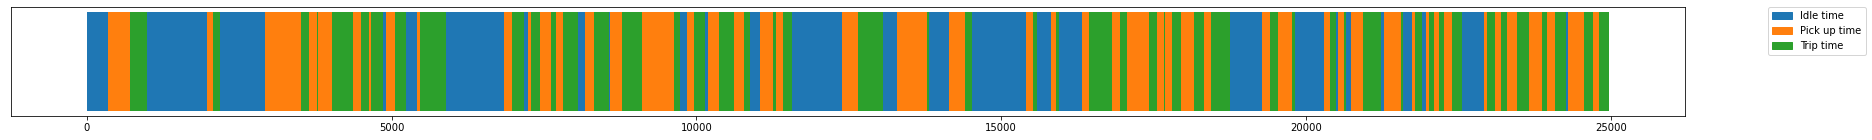

In [18]:
bars = PolyCollection(verts, facecolors=colors)

fig, ax = plt.subplots(figsize=(30,2))
ax.add_collection(bars)
ax.get_yaxis().set_visible(False)
ax.autoscale()
idle = mpatches.Patch(color='C0', label='Idle time')
pick_up = mpatches.Patch(color='C1', label='Pick up time')
in_trip = mpatches.Patch(color='C2', label='Trip time')

plt.legend(handles=[idle,pick_up,in_trip],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# plt.show()
plt.savefig("Driver States")

In [ ]:
driver_data[driver_data['driver_action'] == 1][:5]

In [ ]:
verts

In [ ]:
trip_times

In [15]:
a.completed_percentage()

0.8808411214953271

In [9]:
from RideSimulator.HexGrid import HexGrid
import time
import numpy as np
import random

In [10]:
w = 150
hi = 150
h = HexGrid(1, w, hi, 5)
# h.plot_grid(colour_tiles=[])


def check(loc):
    c = h.get_closest_hex(loc)
    h.plot_grid(colour_tiles=h.get_closet_ring(c))


t = time.time()
for k in range(1000):
    h.get_closest_hex(np.array([random.randint(0, w), random.randint(0, hi)]))
print((time.time() - t))

TypeError: '<' not supported between instances of 'HexTile' and 'HexTile'

In [4]:
from tqdm.auto import trange,tqdm
from time import sleep

# for i in trange(4, desc='1st loop'):
#     for j in trange(5, desc='2nd loop',leave=False):
#         for k in trange(50, desc='3rd loop', leave=False):
#             sleep(0.01)
            
with tqdm(total=4) as week_bar:
    for k in range(3):
        with tqdm(total=7,leave=False) as day_bar:
            for i in range(8):
                sleep(0.2)
                day_bar.update(1)
        week_bar.update(1)
    week_bar.update(3-k)

In [11]:
with tqdm(total=400) as week_bar:
    for k in range(400):
#         sleep(0.0002)
        week_bar.update(1)
        continue

In [6]:
from tqdm.auto import tqdm, trange
from random import random, randint
from time import sleep

with trange(10) as t:
    for i in t:
        # Description will be displayed on the left
        t.set_description('GEN %i' % i)
        # Postfix will be displayed on the right,
        # formatted automatically based on argument's datatype
        t.set_postfix(loss=random(), gen=randint(1,999), str='h',
                      lst=[1, 2])
        sleep(0.1)

with tqdm(total=10, bar_format="{postfix[0]} {postfix[1][value]:>8.2g}",
          postfix=["Batch", dict(value=0)]) as t:
    for i in range(10):
        sleep(0.1)
        t.postfix[1]["value"] = i / 2
        t.update()